# MultiClass Classification:

# strategies for multi classification
1) one-versus-the-rest (OvR) strategy (also called oneversus-all):
system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers. 
select the class whose classifier outputs the highest score.

2) one-versus-one (OvO) strategy:
train a binary classifier for every pair of digits: one
to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.got their decision scores for the image, and selected the class that won the most duels.


In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist.data.to_numpy(),mnist.target.to_numpy()


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000]) #cause svm doesn't scale well to large datasets

SVC(random_state=42)

In [22]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [23]:
# check models preds for each class
some_digit_scores = svm_clf.decision_function([X[0]])
some_digit_scores.round(2)

array([[ 4.98,  0.72,  6.09,  8.3 , -0.29,  9.3 ,  1.75,  2.8 ,  7.2 ,
         3.82]])

In [24]:
class_id = some_digit_scores.argmax()
class_id

5

In [25]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [26]:
svm_clf.classes_[class_id]

'5'

1. If you want decision_function() to return all 45 scores, you can set the decision_function_shape hyperparameter to "ovo". The default value is "ovr", but don't let this confuse you: SVC always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not

In [27]:
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([X[0]])
some_digit_scores_ovo.round(2)

array([[ 0.37, -0.27, -0.61,  0.54, -0.81,  0.37,  0.18, -0.08,  0.25,
        -0.6 , -1.39,  0.02, -1.13, -0.33, -0.48, -1.07, -0.41, -0.85,
         0.6 , -0.65,  0.47,  0.05, -0.32,  0.19,  1.47, -0.55,  0.83,
         0.99,  0.96,  1.24, -1.48, -0.38, -0.41, -1.07, -1.25,  1.09,
         0.95,  1.27,  1.16, -0.13, -0.53, -0.26, -0.32, -0.03,  0.26]])

In [28]:
"""
If you want to force Scikit-Learn to use one-versus-one or one-versus-therest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. 
"""
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [29]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [30]:
len(ovr_clf.estimators_)

10

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf  = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [33]:
sgd_clf.decision_function(X[0].reshape(1,-1)).round()

array([[-26086., -34697.,  -4999.,  -1322., -32247.,   3043., -34494.,
        -14769., -10960.,  -4766.]])

In [36]:
# doing for 2k cause it's slow
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train[:2000],y_train[:2000],cv=3,scoring="accuracy")

array([0.87856072, 0.83958021, 0.82882883])

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled[:2000],y_train[:2000],cv=3,scoring="accuracy")

array([0.88605697, 0.86056972, 0.84834835])

# Error Analysis

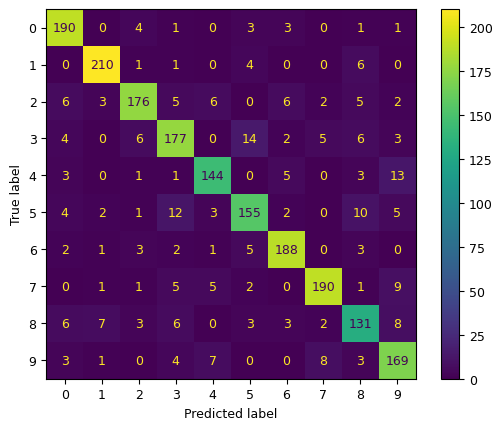

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled[:2000],y_train[:2000],cv=3)

import matplotlib.pyplot as plt
plt.rc('font',size=9)

ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred[:2000])
plt.show()

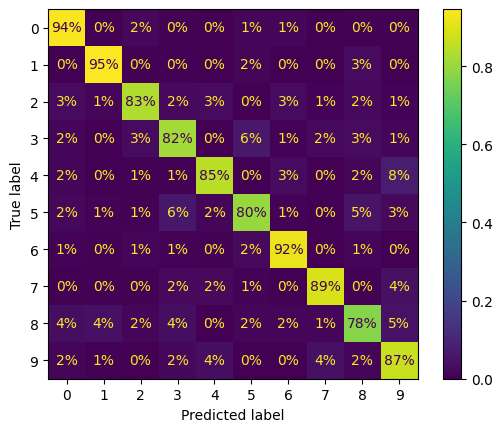

In [41]:
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred[:2000],
                                        normalize="true",values_format=".0%")
plt.show()

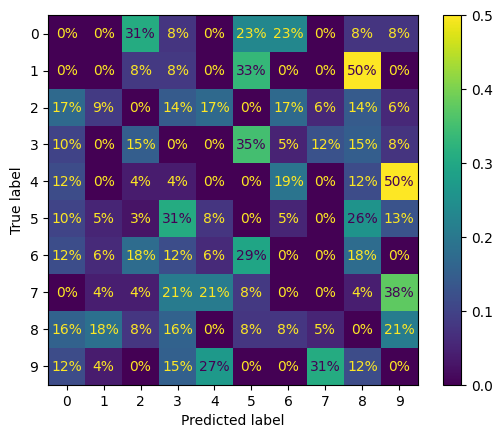

In [45]:
sample_weight = (y_train_pred != y_train[:2000])
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true",values_format=".0%")
plt.show()

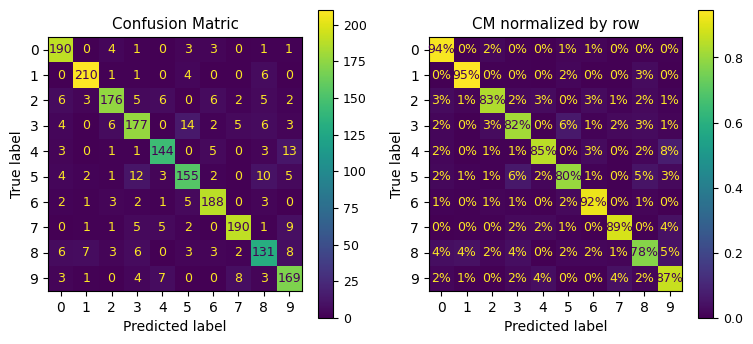

In [46]:
# subplot
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred,ax=axs[0])
axs[0].set_title("Confusion Matric")
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred,ax=axs[1],
                                        normalize="true",values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

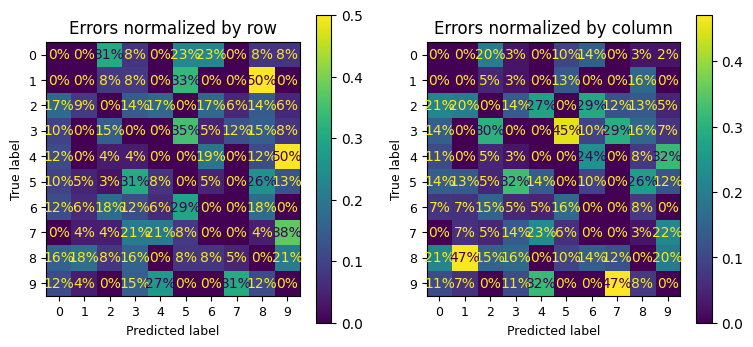

In [47]:
# subplots
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
plt.rc('font',size=10)

ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred,
                                        ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true",values_format=".0%")
axs[0].set_title("Errors normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred,
                                        ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred",values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font',size=14)

In [53]:
cl_a, cl_b = "3", "5"
X_aa = X_train[:2000][(y_train[:2000] == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[:2000][(y_train[:2000] == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[:2000][(y_train[:2000] == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[:2000][(y_train[:2000] == cl_b) & (y_train_pred == cl_b)]



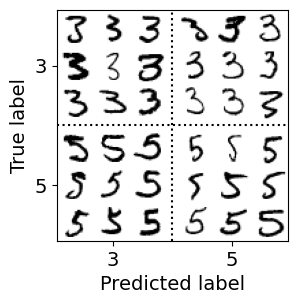

In [56]:
"""
# insights
1) The two 5 × 5 blocks on the left show digits classified as 3s, and the two 5 × 5 blocks on the right show images classified as 5s.

2) most misclassified images seem like obvious
errors to us, and it’s hard to understand why the classifier made the mistakes it did. The reason is that we used a simple SGDClassifier, which is a linear model.
"""

size = 3
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
